Customer Segmentation using Kmeans dan Kmeans++

## Reading & Understanding Data

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import sklearn
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


### Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ITS/AB/dataset/Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# data = pd.read_excel('Online Retail.xlsx')
# data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleansing

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data = data.loc[data['CustomerID'].notnull()]
data = data.drop('Description', axis=1).reset_index().drop(columns='index')
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401599,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [ ]:
data.shape

(401604, 7)

In [ ]:
data.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848470528,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089




*   **Quantity** : Average quantity of each product in transaction is 12.18. Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.
* **InvoiceDate** : Our data has transaction between 01-12-2010 to 09-12-2011
* **UnitPrice** : Average price of each product in transactions is 3.47





In [ ]:
data.describe(include=['O'])

,InvoiceNo,StockCode,Country
count,401604,401604,401604
unique,22190,3684,37
top,576339,85123A,United Kingdom
freq,542,2065,356728


* **InvoiceNo** : Total entries in preprocessed data are 401,604 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.
* **StockCode** : There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.
* **CustomerID** : There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)
* **Country** : Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

In [ ]:
data['year-month'] = data['InvoiceDate'].dt.to_period('M')
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year-month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
401599,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,2011-12
401600,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,2011-12
401601,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,2011-12
401602,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,2011-12


## Data Overview & Preparation

In [ ]:
month_report_sales = data.groupby('year-month')['CustomerID'].nunique()
month_report_sales

year-month
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

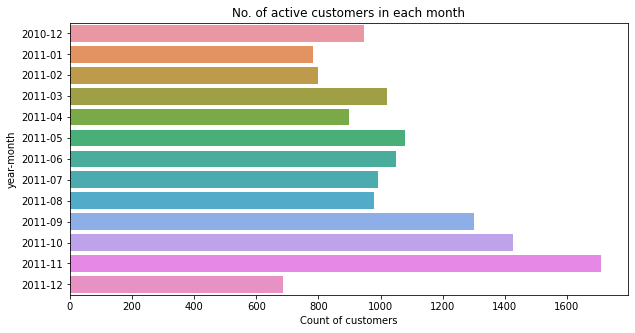

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=month_report_sales.index, x=month_report_sales.values)
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [ ]:
diff_month_report_sales = month_report_sales - month_report_sales.shift(1)
diff_month_report_sales

year-month
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [ ]:
retention_rate = round(month_report_sales.pct_change(periods=1)*100,2)
retention_rate

year-month
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

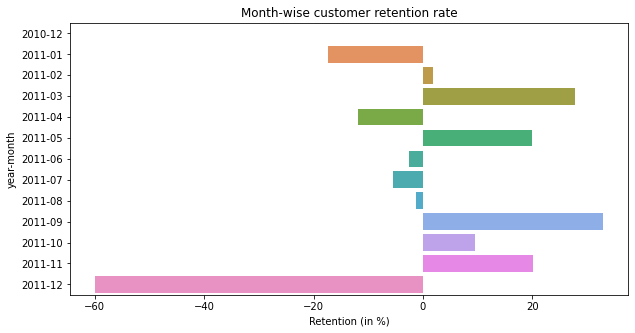

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

In [ ]:
data['totalSales'] = data['Quantity']*data['UnitPrice']
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year-month,totalSales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...
401599,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,10.20
401600,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,12.60
401601,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,16.60
401602,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,16.60


In [ ]:
data_monetary = data.groupby('CustomerID').sum()['totalSales'].reset_index()
data_monetary

,CustomerID,totalSales
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2045.53


In [ ]:
data_freq = data.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
data_freq

,CustomerID,InvoiceNo
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [ ]:
ref_day = max(data['InvoiceDate'])+timedelta(days=1)
ref_day

Timestamp('2011-12-10 12:50:00')

In [ ]:
data['days_last_order'] = (ref_day-data['InvoiceDate']).dt.days
data.head(10)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year-month,totalSales,days_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,374
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010-12,15.30,374
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010-12,25.50,374
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12,11.10,374
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010-12,11.10,374
9,536367,84879,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,2010-12,54.08,374


In [ ]:
data_recency = data.groupby('CustomerID')['days_last_order'].min().reset_index()
data_recency

,CustomerID,days_last_order
0,12346,326
1,12347,2
2,12348,75
3,12349,19
4,12350,310
...,...,...
4367,18280,278
4368,18281,181
4369,18282,8
4370,18283,4


In [ ]:
data_summary = pd.merge(data_freq,data_recency, on='CustomerID', how='inner')
data_summary = pd.merge(data_summary,data_monetary,on='CustomerID',how='inner')
data_summary.columns = ['CustomerID', 'Frequency', 'Recency', 'Monetary']


data_summary 

,CustomerID,Frequency,Recency,Monetary
0,12346,2,326,0.00
1,12347,7,2,4310.00
2,12348,4,75,1797.24
3,12349,1,19,1757.55
4,12350,1,310,334.40
...,...,...,...,...
4367,18280,1,278,180.60
4368,18281,1,181,80.82
4369,18282,3,8,176.60
4370,18283,16,4,2045.53


#### RFM Analysis


In [ ]:
valid_price = data_summary.Monetary > 0
valid_price

0       False
1        True
2        True
3        True
4        True
        ...  
4367     True
4368     True
4369     True
4370     True
4371     True
Name: Monetary, Length: 4372, dtype: bool

In [ ]:
data_summary = data_summary.loc[valid_price].copy().reset_index().drop(['index'],axis=1)
data_customerID = data_summary[['CustomerID']]
data_summary = data_summary[['Recency','Frequency','Monetary']]
data_summary

,Recency,Frequency,Monetary
0,2,7,4310.00
1,75,4,1797.24
2,19,1,1757.55
3,310,1,334.40
4,36,11,1545.41
...,...,...,...
4317,278,1,180.60
4318,181,1,80.82
4319,8,3,176.60
4320,4,16,2045.53


In [ ]:
data_customerID

,CustomerID
0,12347
1,12348
2,12349
3,12350
4,12352
...,...
4317,18280
4318,18281
4319,18282
4320,18283


#### Scaling

In [ ]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(data_summary), columns=data_summary.columns)

## Data Modelling


### K-Means


In [ ]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [ ]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0, init='random')
model.fit(Xstd)

# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

# Append clusters to input features table
Xstd['clusters'] = cluster_labels

Xstd.head()

Assigned cluster labels: 
 [0 0 0 ... 0 0 0]
Location of centroids: 
[[-0.50998156  0.04827116 -0.01441912]
 [-0.85172329  8.33713655  8.96461076]
 [ 1.54673368 -0.34590957 -0.17346685]]


,Recency,Frequency,Monetary,clusters
0,-0.891302,0.200814,0.289474,0
1,-0.154829,-0.118900,-0.014677,0
2,-0.719795,-0.438615,-0.019482,0
3,2.216008,-0.438615,-0.191744,2
4,-0.548287,0.627100,-0.045160,0


In [ ]:
from sklearn import metrics
print('Score Silhouette : ', metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean'))

Score Silhouette :  0.7137978174630887


In [ ]:
model.inertia_

5469.499420650507

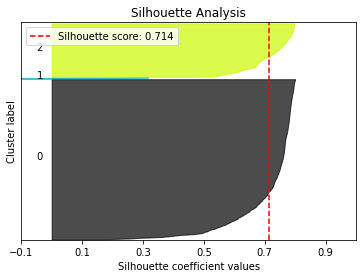

In [ ]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plot_silhouette(Xstd, cluster_labels);

### K-Means++


In [ ]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [ ]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0, init='k-means++')
model.fit(Xstd)

# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

# Append clusters to input features table
Xstd['clusters'] = cluster_labels

Xstd.head()

Assigned cluster labels: 
 [0 0 0 ... 0 0 0]
Location of centroids: 
[[-5.10311459e-01  5.33069088e-02 -1.11329098e-02  9.30809805e-04]
 [-8.50069965e-01  8.71263171e+00  9.67529118e+00  1.00000000e+00]
 [ 1.54673368e+00 -3.45909569e-01 -1.73466848e-01  2.00000000e+00]]


,Recency,Frequency,Monetary,clusters
0,-0.891302,0.200814,0.289474,0
1,-0.154829,-0.118900,-0.014677,0
2,-0.719795,-0.438615,-0.019482,0
3,2.216008,-0.438615,-0.191744,2
4,-0.548287,0.627100,-0.045160,0


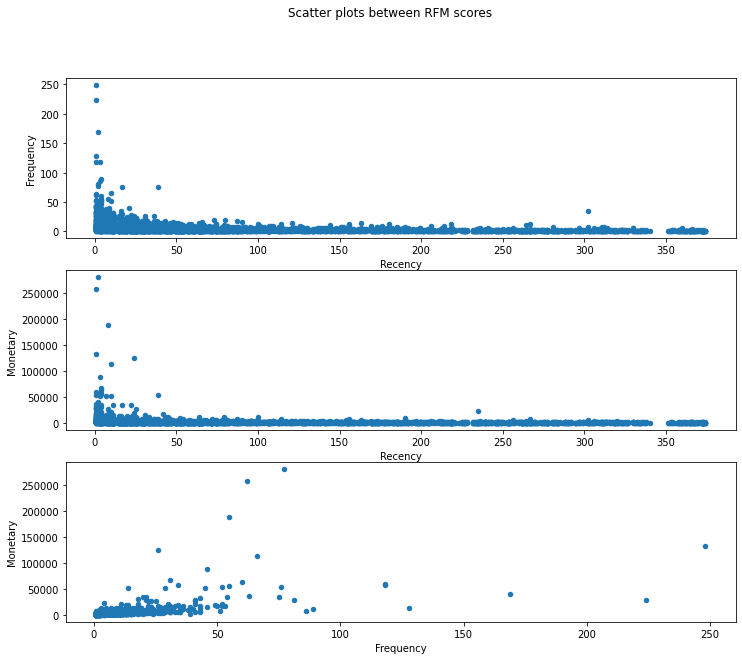

In [ ]:
# Finally lets review the scatter plots between the different scores

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM scores')
data_summary.plot.scatter(x = 'Recency', y = 'Frequency', ax = ax1, figsize = (12,10));
data_summary.plot.scatter(x = 'Recency', y = 'Monetary', ax = ax2);
data_summary.plot.scatter(x = 'Frequency', y = 'Monetary', ax = ax3);

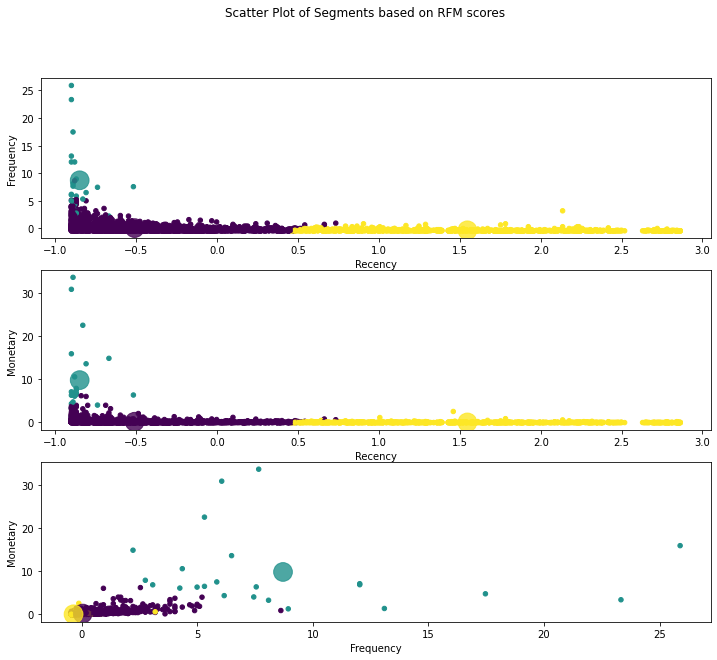

In [ ]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

Xstd.plot.scatter(x = 'Recency', y = 'Frequency', c=Xstd['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Recency', y = 'Monetary', c=Xstd['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Frequency', y = 'Monetary', c=Xstd['clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');
# plt.legend(['÷cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster1'])

In [ ]:
from sklearn import metrics
print('Score Silhouette : ', metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean'))

Score Silhouette :  0.7125068797573912


In [ ]:
model.inertia_

5469.173493851153

In [ ]:
!pip install scikit-plot

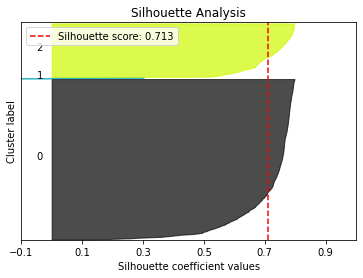

In [ ]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plot_silhouette(Xstd, cluster_labels);

#### Kmeans++ Evaluation

In [ ]:
inertias = []
ss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(Xstd)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))

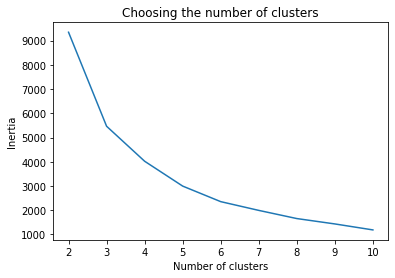

In [ ]:
plt.plot(range(2, 11), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
min(inertias)

1186.5332884420384

In [ ]:
inertias[8]

1186.5332884420384

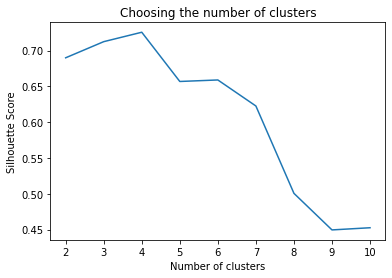

In [ ]:
plt.plot(range(2, 11), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
Xstd = Xstd[['Recency','Frequency','Monetary']]
Xstd

,Recency,Frequency,Monetary
0,-0.891302,0.200814,0.289474
1,-0.154829,-0.118900,-0.014677
2,-0.719795,-0.438615,-0.019482
3,2.216008,-0.438615,-0.191744
4,-0.548287,0.627100,-0.045160
...,...,...,...
4317,1.893171,-0.438615,-0.210360
4318,0.914570,-0.438615,-0.222438
4319,-0.830770,-0.225472,-0.210844
4320,-0.871125,1.159957,0.015376


**Re-run**

In [ ]:
# Inisiasi K number, dengan 8 area mulai low - high value customer
k=4

In [ ]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0, init='k-means++')
model.fit(Xstd)

# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

# Append clusters to input features table
Xstd['clusters'] = cluster_labels

Xstd.head()

Assigned cluster labels: 
 [3 3 3 ... 3 3 3]
Location of centroids: 
[[ 1.55913316 -0.34930356 -0.17370795]
 [-0.81884693  3.78936636  1.99928558]
 [-0.83413279  8.9396753  21.81066889]
 [-0.49641268 -0.03165012 -0.05289681]]


,Recency,Frequency,Monetary,clusters
0,-0.891302,0.200814,0.289474,3
1,-0.154829,-0.118900,-0.014677,3
2,-0.719795,-0.438615,-0.019482,3
3,2.216008,-0.438615,-0.191744,0
4,-0.548287,0.627100,-0.045160,3


In [ ]:
from sklearn import metrics
print('Score Silhouette : ', metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean'))

Score Silhouette :  0.7820825496791012


In [ ]:
data_summary['Profile'] = cluster_labels
data_summary['Profile'].replace({0: "Low Value", 1:"High Value", 2:"High Value",3: "Mid Value"}, inplace = True)
data_summary.head(40)

,Recency,Frequency,Monetary,Profile
0,2,7,4310.00,Mid Value
1,75,4,1797.24,Mid Value
2,19,1,1757.55,Mid Value
3,310,1,334.40,Low Value
4,36,11,1545.41,Mid Value
5,204,1,89.00,Low Value
6,232,1,1079.40,Low Value
7,214,1,459.40,Low Value
8,23,3,2811.43,Mid Value
9,33,1,6207.67,Mid Value


In [ ]:
data_summary.Profile.describe(include=['O'])

count          4322
unique            3
top       Mid Value
freq           3144
Name: Profile, dtype: object

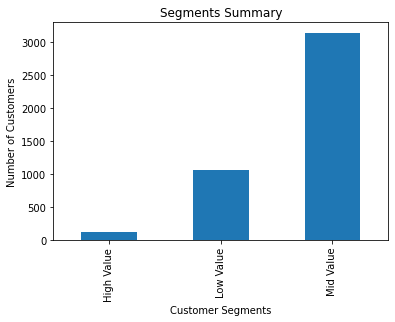

In [ ]:
data_summary.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary");

In [ ]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels)


0.7820825496791012

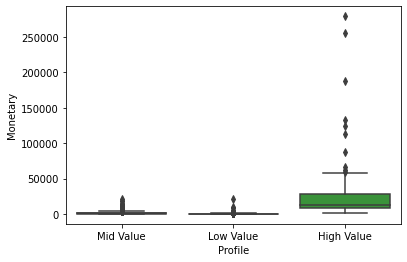

In [ ]:
# plot Cluster Labels vs Amount

sns.boxplot(x='Profile', y='Monetary', data=data_summary)

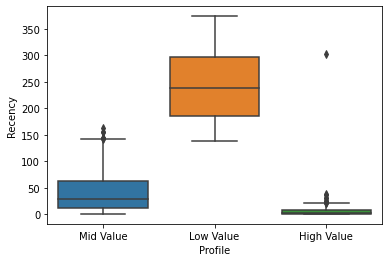

In [ ]:
# plot Cluster Labels vs Recency

sns.boxplot(x='Profile', y='Recency', data=data_summary)

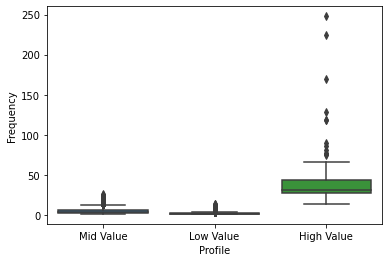

In [ ]:
# plot Cluster Labels vs Frequency

sns.boxplot(x='Profile', y='Frequency', data=data_summary)

In [ ]:
data_summary

,Recency,Frequency,Monetary,Profile
0,2,7,4310.00,Mid Value
1,75,4,1797.24,Mid Value
2,19,1,1757.55,Mid Value
3,310,1,334.40,Low Value
4,36,11,1545.41,Mid Value
...,...,...,...,...
4317,278,1,180.60,Low Value
4318,181,1,80.82,Low Value
4319,8,3,176.60,Mid Value
4320,4,16,2045.53,Mid Value


### Hierarchical Clustering

In [ ]:
Xstd = Xstd[['Recency','Frequency','Monetary']]
Xstd

,Recency,Frequency,Monetary
0,-0.891302,0.200814,0.289474
1,-0.154829,-0.118900,-0.014677
2,-0.719795,-0.438615,-0.019482
3,2.216008,-0.438615,-0.191744
4,-0.548287,0.627100,-0.045160
...,...,...,...
4317,1.893171,-0.438615,-0.210360
4318,0.914570,-0.438615,-0.222438
4319,-0.830770,-0.225472,-0.210844
4320,-0.871125,1.159957,0.015376


In [ ]:
rfm = data_summary[['Recency','Frequency','Monetary']]
rfm

,Recency,Frequency,Monetary
0,2,7,4310.00
1,75,4,1797.24
2,19,1,1757.55
3,310,1,334.40
4,36,11,1545.41
...,...,...,...
4317,278,1,180.60
4318,181,1,80.82
4319,8,3,176.60
4320,4,16,2045.53


In [ ]:
rfm_df_scaled =  Xstd
rfm_df_scaled

,Recency,Frequency,Monetary
0,-0.891302,0.200814,0.289474
1,-0.154829,-0.118900,-0.014677
2,-0.719795,-0.438615,-0.019482
3,2.216008,-0.438615,-0.191744
4,-0.548287,0.627100,-0.045160
...,...,...,...
4317,1.893171,-0.438615,-0.210360
4318,0.914570,-0.438615,-0.222438
4319,-0.830770,-0.225472,-0.210844
4320,-0.871125,1.159957,0.015376


#### Implementing Hierarchical Clustering

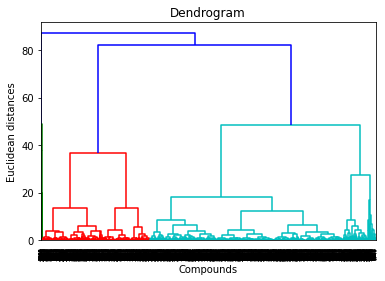

<Figure size 115200x18000 with 0 Axes>

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure

dendrogram = sch.dendrogram(sch.linkage(rfm_df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Compounds')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_labels = hac.fit_predict(rfm_df_scaled)

In [ ]:
# assign cluster labels

rfm['Cluster_Labels'] = cluster_labels

In [ ]:
rfm['Profile'] = cluster_labels
rfm['Profile'].replace({0: "Low Value", 1: "High Value", 2: "Mid Value"}, inplace = True)

In [ ]:
rfm

,Recency,Frequency,Monetary,Cluster_Labels,Profile
0,2,7,4310.00,1,High Value
1,75,4,1797.24,1,High Value
2,19,1,1757.55,1,High Value
3,310,1,334.40,2,Mid Value
4,36,11,1545.41,1,High Value
...,...,...,...,...,...
4317,278,1,180.60,2,Mid Value
4318,181,1,80.82,2,Mid Value
4319,8,3,176.60,1,High Value
4320,4,16,2045.53,1,High Value


In [ ]:
result_hierarchi = pd.concat([data_customerID,rfm],axis=1)
result_hierarchi

,CustomerID,Recency,Frequency,Monetary,Cluster_Labels,Profile
0,12347,2,7,4310.00,1,High Value
1,12348,75,4,1797.24,1,High Value
2,12349,19,1,1757.55,1,High Value
3,12350,310,1,334.40,2,Mid Value
4,12352,36,11,1545.41,1,High Value
...,...,...,...,...,...,...
4317,18280,278,1,180.60,2,Mid Value
4318,18281,181,1,80.82,2,Mid Value
4319,18282,8,3,176.60,1,High Value
4320,18283,4,16,2045.53,1,High Value


####  Plotting

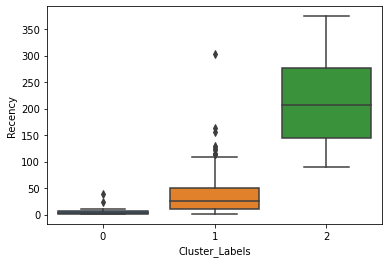

In [ ]:
# plot Cluster vs Recency

sns.boxplot(x='Profile', y='Recency', data=result_hierarchi)
plt.xlabel("Customer Profile")
plt.title("Recency Analysis")

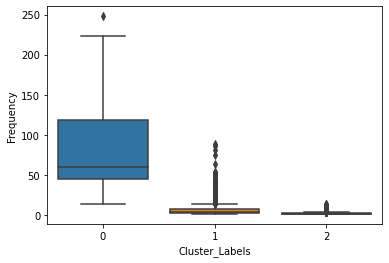

In [ ]:
# plot Cluster vs Frequency

sns.boxplot(x='Profile', y='Frequency', data=result_hierarchi)
plt.xlabel("Customer Profile")
plt.title("Frequency Analysis")

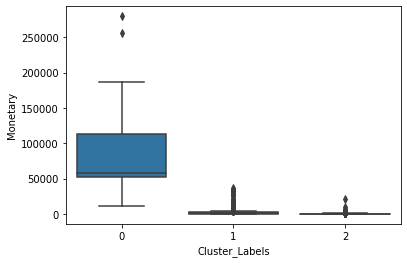

In [ ]:
# plot Cluster vs Amount

sns.boxplot(x='Profile', y='Monetary', data=result_hierarchi)
plt.xlabel("Customer Profile")
plt.title("Monetary Analysis")

#### Hierarchical Clustering Evaluation

In [ ]:
# evaluate hierarchical clustering

from sklearn import metrics
metrics.silhouette_score(rfm_df_scaled, cluster_labels)

0.534739759428519